# Taller de Física Computacional

Carlos Ruestes / Cristián Sánchez - Taller de Física Computacional - FCEN - UNCUYO

# Sesión 17: Movimiento en un campo magnético uniforme

## Introducción

Una partícula cargada que se mueve en un campo magnético experimenta una fuerza magnética gobernada por la ley de Lorentz. Esta fuerza es siempre perpendicular a la dirección de movimiento de la partícula. Si la partícula se mueve en un campo magnético uniforme y la velocidad de la partícula es normal a la dirección del campo la trayectoria de la partícula será circular. Si la dirección de la velocidad de la partícula no es normal a la dirección del campo la partícula se moverá siguiendo una trayectoria helicoidal, a no ser que su movimiento sea completamente paralelo a la direción del campo en cuyo caso no hay fuerza de Lorenz y la partícula se moverá en línea recta. En este *notebook* simularemos ambos escenarios a partir de la integración numérica de las ecuaciones de movimiento de la partícula utilizando el método de Euler.

## Teoría
## La ley de Lorentz

Un partícula de carga $Q$ y masa $m_p$ que se mueve con velocidad $\mathbf{v}$ en un campo magnético $\mathbf{B}$ experimenta una fuerza

\begin{equation}
    \mathbf{F}_{mag} = Q(\mathbf{v} \times \mathbf{B})
\label{Lorentz}
\end{equation}

conocida como *Fuerza de Lorentz*. Donde hemos utulizado símbolos en negrita para representar vectores y símbolos comunes para representar escalares.

### Discretización

La segunda ley de Newton para una partícula que se mueve sometida a la fuerza de Lorentz es una ecuación diferencial ordinaria de sugundo orden:

\begin{equation}
m_p\frac{d^2\mathbf{x}}{dt^2} = Q\big(\frac{d\mathbf{x}}{dt} \times \mathbf{B}\big),
\label{LorentzODE}
\end{equation}

donde los componentes de la velocidad se escriben como derivadas temporales de la posición $v_i = dx_i/dt$ y la aceleración como la segunda derivada de la posición respecto al tiempo $d^2\mathbf{x}/dt^2$. Descomponiendo los vectores la ecuación de movimiento puede ser reducida a tres conjuntos de dos ecuaciones diferenciales de primer orden.

\begin{equation}
\begin{aligned}
    &\frac{dx}{dt} = v_x\\[4pt]
    &\frac{dv_x}{dt} = \frac{Q}{m_{p}}(v_yB_z - v_zB_y)\\[10pt]
    &\frac{dy}{dt} = v_y\\[4pt]
    &\frac{dv_y}{dt}= \frac{Q}{m_{p}}(v_zB_x - v_xB_z)\\[10pt]
    &\frac{dz}{dt} = v_z\\[4pt]
    &\frac{dv_z}{dt} = \frac{Q}{m_{p}}(v_xB_y - v_yB_x) .
\end{aligned}
\label{LorentzComponents}
\end{equation}

Utilizando un método numérico tal como el método de Euler o Runge-Kutta de cuarto orden podemos encontrar soluciones aproximadas para la ecuación diferencial ordinaria utilizando un paso de tiempo determinado $\Delta t$, encontrando así el movimiento de la partícula en el campo.

## Validez numérica

### Conservación de la energía

Dado que la fuerza de Lorentz es el producto cruzado entre la velocidad de la partícula y el campo magnético, su dirección es siempre perpendicular a la velocidad de la partícula. En consecuencia, la fuerza de Lorentz no hace trabajo sobre la partícula y su energía cinética se conserva. Una prueba de la validez numérica del resultado obtenido por lo tanto es verificar la desviación de las energías cinética inicial y final.

### Radio de Larmor

Como se mencionó en la introducción, una partícula cargada se moverá en una trayectoria circular si tiene una componente de velocidad perpendicular al campo magnético externo.

As stated in the introduction, a charged particle will move in a circle if it has a velocity component perpendicular to an external magnetic field. El radio de la trayectoria circular, llamado radio de Larmor, está dado por

\begin{equation}
r_L = \frac{mv_{\perp}}{|Q| B} ,
\label{larmorRadius}
\end{equation}

donde $v_{\perp}$ es la componente de la velocidad de la partícula perpendicular al campo magnético de magnitud $B$.

## Implementación

In [1]:
# Primero importamos todas las librerías y paquetes necesarios
import numpy as np              
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use("bmh")            # Definimos un estilo para los gráficos
# tamaños de las figuras y resolución en DPI
%matplotlib inline              
figsize = (6, 6)                
dpi = 100                     

Para integrar las ecuaciones de movimiento utilizaremos el método de Euler que ya hemos usado en casos anteriores. En la celda que sigue definimos una función para obtener el lado derecho de las ecuaciones de movimiento descriptas más arriba, así como un paso de Euler dada la velocidad y posición en el tiempo actual.

In [2]:
def RHS(M, RHSargs):
    """ Devuelve el lado derecho del conjunto de ecuaciones 
        diferenciales ordinarias.
    Argumentos:
        M         arreglo de 1x6 conteniendo las componentes
                  cartesianas de la posición y velocidad.
        RHSargs   arreglo de 1x5 conteniendo los argumentos y variables
                  para calcular los lados derechos.
    """
    x, y, z, vx, vy, vz = M
    Q, mass, Bx, By, Bz = RHSargs
    ddt_vx = Q/mass*(vy*Bz - vz*By)
    ddt_vy = Q/mass*(vz*Bx - vx*Bz)
    ddt_vz = Q/mass*(vx*By - vy*Bx)
    ddt_x = vx
    ddt_y = vy
    ddt_z = vz
    return ddt_x, ddt_y, ddt_z, ddt_vx, ddt_vy, ddt_vz


def eulerStep(M, dt, RHS, RHSargs):
    """ Lleva a cabo un paso de integración utilizando el método de Euler."""
    x, y, z, vx, vy, vz = M # Extrae las componentes de la posición y velocidad
    dx, dy, dz, dvx, dvy, dvz = RHS(M, RHSargs) # Calcula el lado derecho de las ODE
    # Incrementa cada componente
    x = x + dx*dt
    y = y + dy*dt
    z = z + dz*dt
    vx = vx + dvx*dt
    vy = vy + dvy*dt
    vz = vz + dvz*dt
    return x, y, z, vx, vy, vz

For now, we want the particle to move in a uniform magnetic field with an initial velocity perpendicular to the field direction.

Desviación entre energía inicial y final:		2.020 porciento


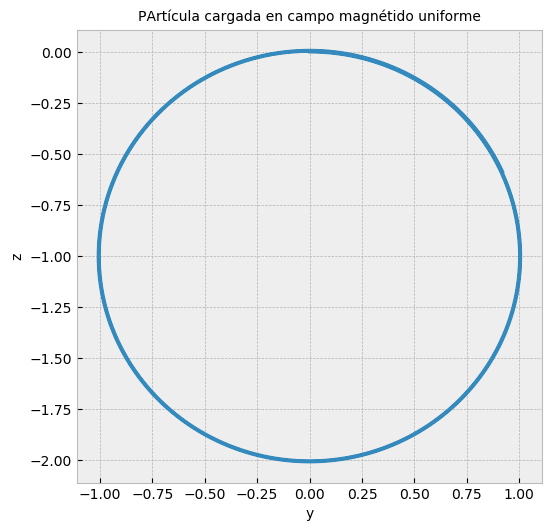

In [3]:
Q = 1                   # Carga de la partícula
mass = 1                # Masa de la partícula
Bx = 10                 # Componente x del campo magnético
By = 0                  # Componente y del campo magnético
Bz = 0                  # Componente z del campo magnético
h = 1e-4                # Paso de tiempo
tMax = 2                # Duración total de la integración
n = int(tMax/h)         # Número de puntos


# Arreglo de argumentos para la función que calcula el lado derecho
RHSargs = np.array([Q, mass, Bx, By, Bz])

# Inicialización de la matriz de datos
M = np.zeros((6, n))

# posiciones y velocidades iniciales
x0 = 0    
y0 = 0   
z0 = 0    
vx0 = 0   
vy0 = 10  
vz0 = 0   
M[:, 0] = np.array([x0, y0, z0, vx0, vy0, vz0]) # almacenamos en el arreglo

# La matriz M contendrá n columnas dadas por los pasos de tiempo 
# y seis filas para cada componente
# 

# Intragramos la trayectoria de la partícula
for i in range(n-1):
    M[:, i+1] = eulerStep(M[:, i], h, RHS, RHSargs)
    
# Calculamos la desviación en la energía cinética  
Ke_initial = 0.5*mass*np.absolute(np.linalg.norm(M[3:6, 0], axis=0))**2 # mv^2/2 
Ke_final = 0.5*mass*np.absolute(np.linalg.norm(M[3:6, -1], axis=0))**2
energyDeviation = np.abs(Ke_final - Ke_initial)/Ke_initial*100
print("Desviación entre energía inicial y final:\t\t%.3f porciento"%(energyDeviation))

# Plot path
plt.figure(figsize=(6, 6), dpi=dpi)
plt.plot(M[1], M[2])
plt.xlabel('y', size=10)
plt.ylabel('z', size=10)
plt.title("PArtícula cargada en campo magnétido uniforme", size=10)

plt.show()

Como describimos, la partícula se mueve en un círculo en el plano $xy$. Nuestros parámetros dan un radio de Larmor de $r_g = 1$.

En cuanto a la conservación de la energía vemos que la misma se desvía en alrededor del  $2\%$ de su valor inicial, indicando que el paso de tiempo es groseramente adecuado para este intervalo de integración. Sin embargo, si integráramos por un tiempo más largo (mayor `tmax`), esta desviación podría crecer hasta ser demasiado grande debido a la acumulación del paso de Euler. Podemos hacer una prueba de convergencia utilizando distintos pasos de tiempo y comparando el error total.

**OJO: la celda que sigue usa mucho tiempo de cálculo**

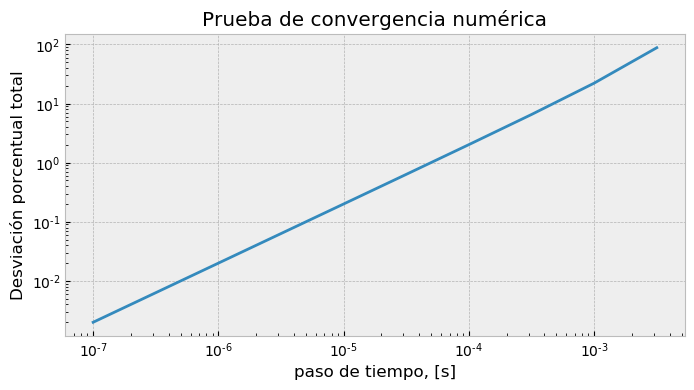

In [4]:
# Creamos un arreglo de pasos de tiempos con un espaciado logarítmico
timeSteps = np.logspace(-7, -2.5, 10)
# Arreglo que contendrá las desviaciones para cada paso de tiempo
deviations = np.zeros((len(timeSteps)))

Ke_initial = 0.5*mass*np.absolute(np.linalg.norm(M[3:6, 0], axis=0))**2

for k in range(len(timeSteps)):
    h = timeSteps[k]
    n = int(tMax/h)   # número de puntos de datos
    # Inicialización de la matriz
    M = np.zeros((6, n))
    M[:, 0] = np.array([x0, y0, z0, vx0, vy0, vz0]) # almacenamos los valores iniciales
    
    # Integramos la trayectoria
    for i in range(n-1):
        M[:, i+1] = eulerStep(M[:, i], h, RHS, RHSargs)

    # Calculamos la desviación de la energía cinética
    Ke_final = 0.5*mass*np.absolute(np.linalg.norm(M[3:6, -1], axis=0))**2
    energyDeviation = np.abs(Ke_final - Ke_initial)/Ke_initial*100
    deviations[k] = energyDeviation

plt.figure(figsize=(8, 4), dpi=dpi)
plt.loglog(timeSteps, deviations)
plt.xlabel('paso de tiempo, [s]')
plt.ylabel('Desviación porcentual total')
plt.title('Prueba de convergencia numérica')
plt.show()

De gráfico vemos que el error en la energía cinética es de primer orden en el paso de tiempo. Este resultado indica que para obtener una desviación menor a $0.1\%$ debe utilizarse un paso de tiempo menor a $10^{-5}\mathrm{s}$.

¿Qué ocurre si la partícula tiene velocidad inicial tanto en la dirección x como y?

Desviación entre energía inicial y final:		0.100 porciento


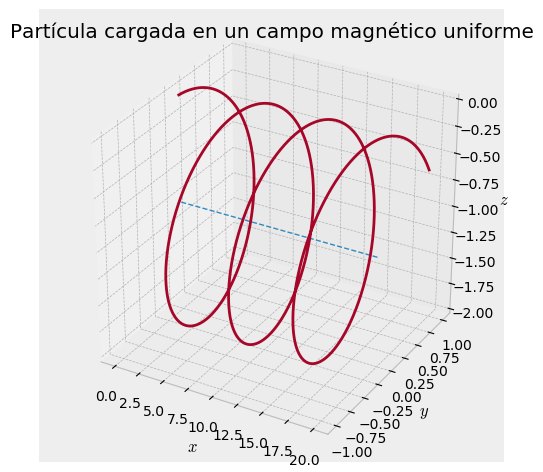

In [5]:
vx0 = 10             # Reiniciamos el valor de la componente x
h = 1e-5
n = int(tMax/h)      # número de puntos
M = np.zeros((6, n)) #Reinicializamos la matriz de datos
M[:, 0] = np.array([x0, y0, z0, vx0, vy0, vz0])

for i in range(n-1):
    M[:, i+1] = eulerStep(M[:, i], h, RHS, RHSargs)
# Cálculo de la desviación de la energía cinética
Ke_initial = 0.5*mass*np.absolute(np.linalg.norm(M[3:6, 0], axis=0))**2 # mv^2/2 
Ke_final = 0.5*mass*np.absolute(np.linalg.norm(M[3:6, -1], axis=0))**2
energyDeviation = np.abs(Ke_final - Ke_initial)/Ke_initial*100
print("Desviación entre energía inicial y final:\t\t%.3f porciento"%(energyDeviation))
    
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# Plotting guiding line
ax.plot(M[0], M[0]*0, np.ones(len(M[0]))*-1, '--', linewidth=1)
# Plotting particle path
ax.plot(M[0], M[1], M[2])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
ax.set_title("Partícula cargada en un campo magnético uniforme")

plt.show()

Obtenemor una trayectoria helicoidal. La velocidad en la direción $x$ no cambia como consecuencia del producto cruz que da lugar a la fuerza de Lorentz. La línea azul es el movimiento del centro de giro.

## Ejercicios

- Crear un nuevo notebook y repetir la integración utilizando `odeint`.
- Agregar un campo eléctrico causado por una carga puntual ubicada en el origen y estudiar el movimiento de la partícula cargada en esta situación.